In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df_total = pd.read_csv('cases-brazil-states.csv')
df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [ ]:
df = df_total[df_total['estado'] != 'TOTAL']
df['data'] = pd.to_datetime(df_total['data']).dt.date
df.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'óbitos')

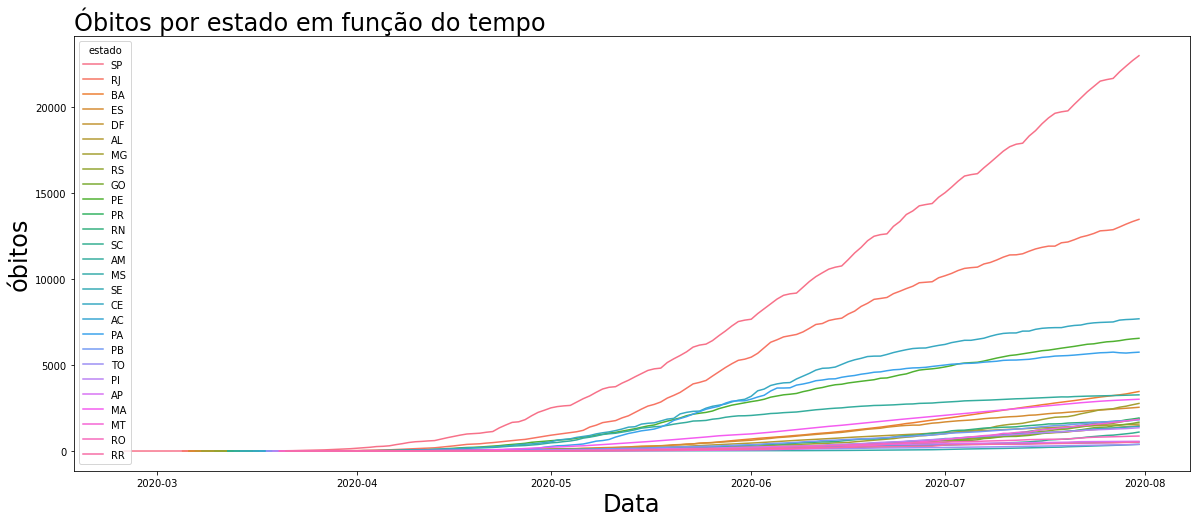

In [ ]:
plt.figure(figsize=(20, 8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.set_title('Óbitos por estado em função do tempo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('óbitos', fontsize=24)

In [ ]:
df_sp = df[df['estado'] == 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


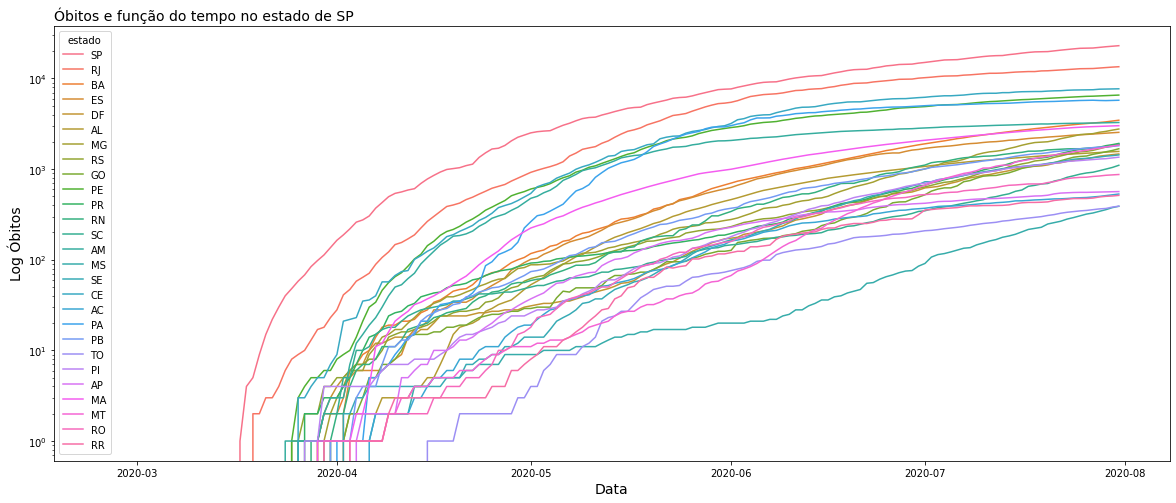

In [ ]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.set_title('Óbitos e função do tempo no estado de SP', loc='left',  fontsize=14)
fig.set_xlabel('Data', fontsize=14)
fig.set_ylabel('Log Óbitos', fontsize=14)
fig.set_yscale('log') #Gráfico monolog (Aplicar Logaritmo em somente um dos eixos (Normalmente no eixo Y))


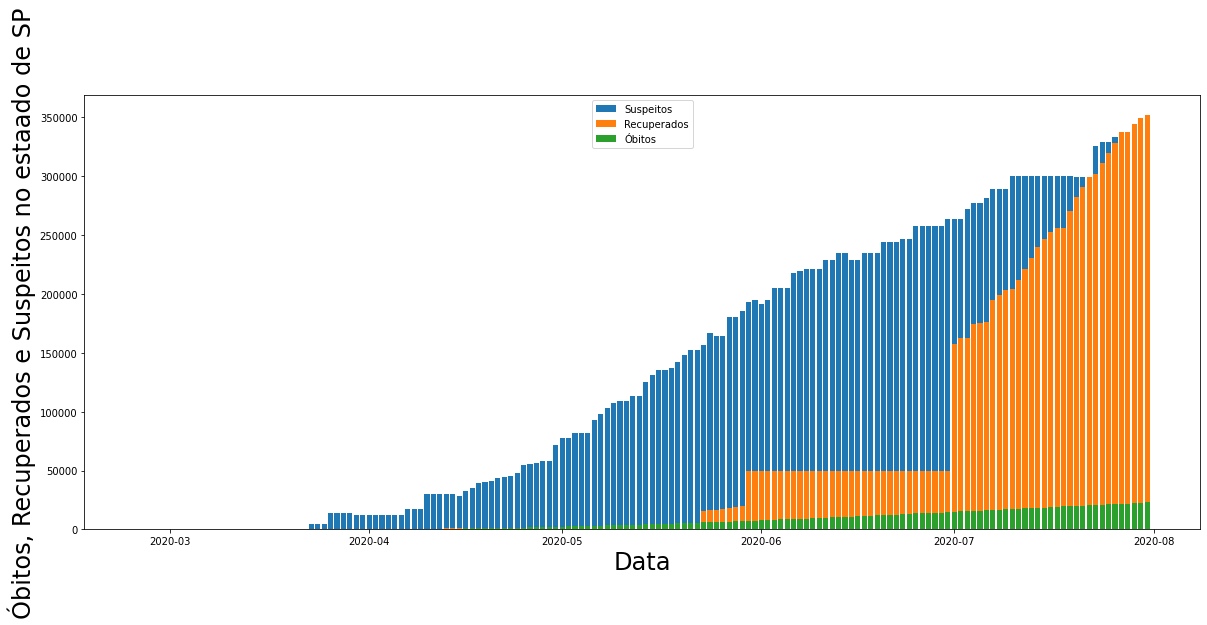

In [ ]:
plt.figure(figsize=(20, 8))
fig = plt.bar(df_sp.data, df_sp.suspeitos, label='Suspeitos')
plt.bar(df_sp.data, df_sp.recuperados, label='Recuperados')
plt.bar(df_sp.data, df_sp.Obitos, label='Óbitos')
plt.xlabel('Data', fontsize=24)
plt.ylabel('Óbitos, Recuperados e Suspeitos no estaado de SP', fontsize=24, rotation=90)
plt.legend()

In [ ]:
def plotar_linha (titulo, xlabel, ylabel, x, y, dataset, hue):
  ax = sns.lineplot(x=x, y=y, hue=hue, data=dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc='left', fontsize=20)
  ax.set_xlabel(xlabel, fontsize=20)
  ax.set_ylabel(ylabel, fontsize=20, rotation=90)
  ax.legend()

In [ ]:
def plotar_barra (titulo, xlabel, ylabel, x, y, dataset):
  plt.figure(figsize=(20, 6))
  ax = plt.bar(dataset[x], dataset[y])
  plt.title(titulo, loc='left', fontsize=20)
  plt.xlabel(xlabel, fontsize=20)
  plt.ylabel(ylabel, fontsize=20, rotation=90)
  ax.legend()

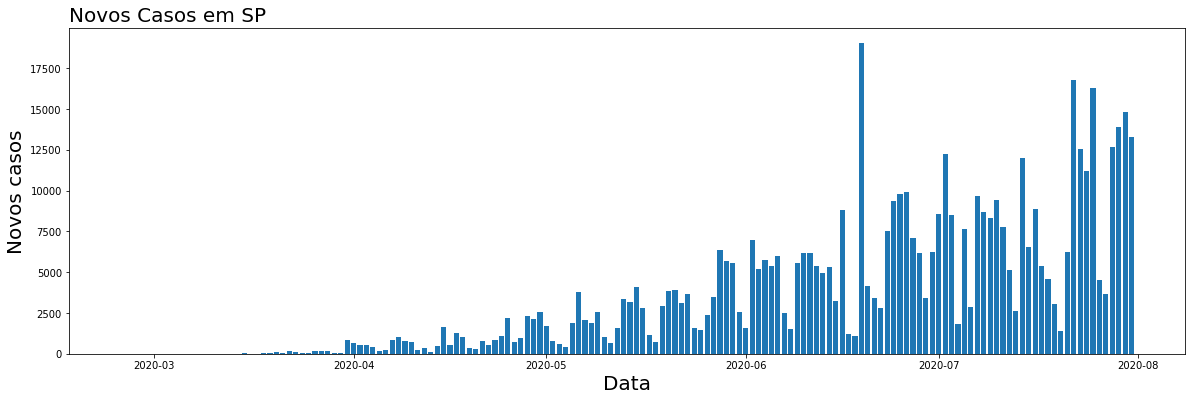

In [ ]:
plotar_barra('Novos Casos em SP', 'Data', 'Novos casos', 'data', 'novosCasos', df_sp)

In [ ]:
df_sp['aceleracaoCasos'] = df_sp['novosCasos'].diff() #Cálcular diferenças de Novos casos por dia (Ex: Calcular difereça do dia 10 pro dia 9)
df_sp['aceleracaoObitos'] = df_sp['novosObitos'].diff() #idem acima
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,acaleracaoObitos,aceleracaoObitos
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,0.0
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,0.0


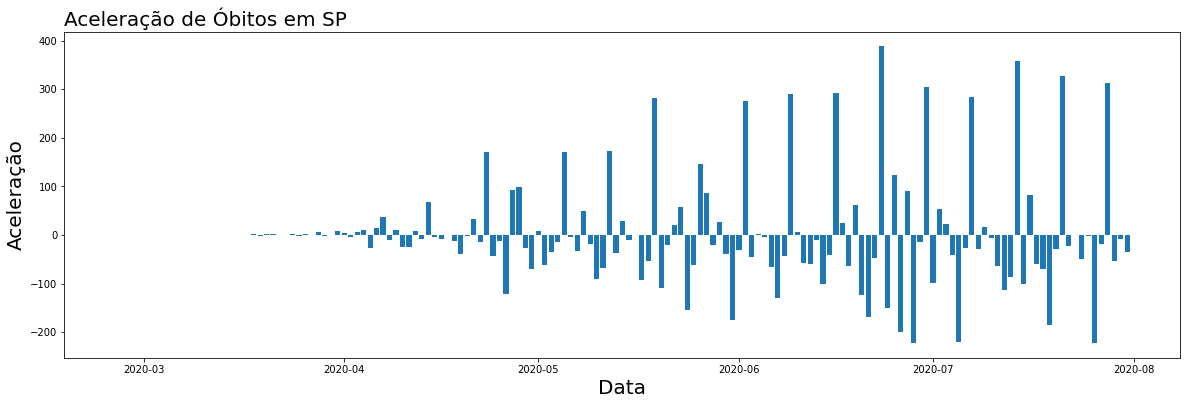

In [ ]:
plotar_barra('Aceleração de Óbitos em SP', 'Data', 'Aceleração', 'data', 'aceleracaoObitos', df_sp)

In [ ]:
df_sp['mediaObitos'] = df_sp.novosObitos.rolling(window=7, center=False).mean()
df_sp['mediaObitos_14'] =  df_sp.novosObitos.rolling(window=14, center=False).mean()
df_sp.head(10)

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,acaleracaoObitos,aceleracaoObitos,mediaObitos,mediaObitos_14
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,0.0,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,0.0,NaN,NaN
10,10,2020-03-01,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
12,10,2020-03-02,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
14,10,2020-03-03,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
16,10,2020-03-04,Brazil,SP,TOTAL,0,0,1,3,0,3,0.0,0.00653,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN
19,10,2020-03-05,Brazil,SP,TOTAL,0,0,3,6,0,6,0.0,0.01307,0.0,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0,NaN


No handles with labels found to put in legend.
No handles with labels found to put in legend.


<BarContainer object of 158 artists>

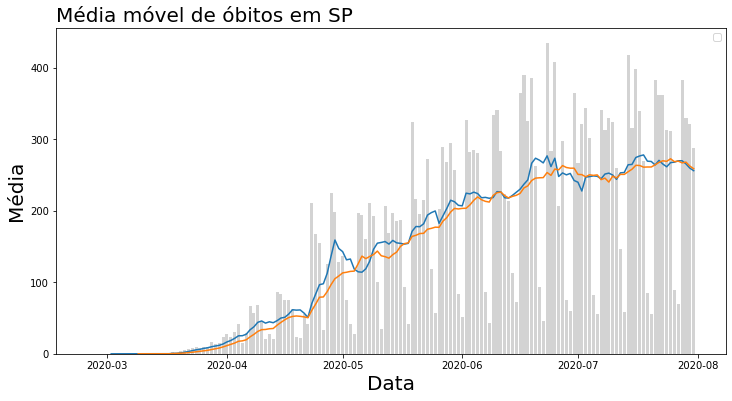

In [ ]:
plotar_linha('Média móvel de óbitos em SP', 'Data', 'Média', 'data', 'mediaObitos', df_sp, None)
plotar_linha('Média móvel de óbitos em SP', 'Data', 'Média', 'data', 'mediaObitos_14', df_sp, None)
plt.bar(df_sp.data, df_sp.novosObitos, color='lightgrey')

In [ ]:
from pandas.plotting import autocorrelation_plot

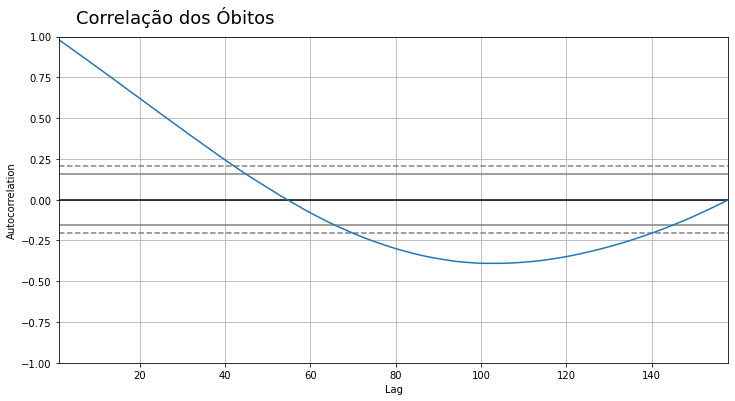

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos Óbitos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp.Obitos)
ax = ax

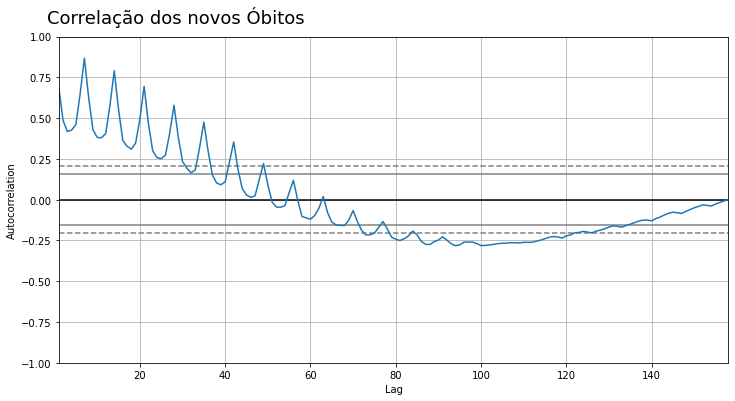

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos novos Óbitos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp.novosObitos)
ax = ax